In [409]:
# Import dependencies
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import missingno as mso

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import MaxAbsScaler

In [410]:
# Import data from github
df_train = pd.read_csv('https://raw.githubusercontent.com/QGdtsc/ML_data_and_models/main/Kaggle_competitions/Titanic/train.csv')
df_test = pd.read_csv('https://raw.githubusercontent.com/QGdtsc/ML_data_and_models/main/Kaggle_competitions/Titanic/test.csv')
df_check = pd.read_csv('https://raw.githubusercontent.com/QGdtsc/ML_data_and_models/main/Kaggle_competitions/Titanic/gender_submission.csv')

In [411]:
print("Full train dataset shape is {}".format(df_train.shape))
print("Full test dataset shape is {}".format(df_test.shape))
print('')
df_train

Full train dataset shape is (891, 12)
Full test dataset shape is (418, 11)



,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [412]:
# Explore dataframe
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


<Axes: >

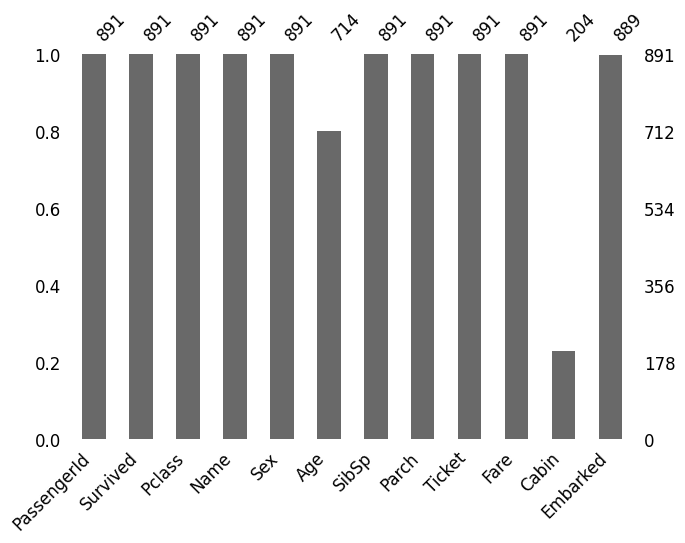

In [413]:
# Missing values in df_train
plt.figure(figsize=(16,5))
ax_train = plt.subplot(1,2,2)
mso.bar(df_train,ax=ax_train,fontsize = 12)

In [414]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


<Axes: >

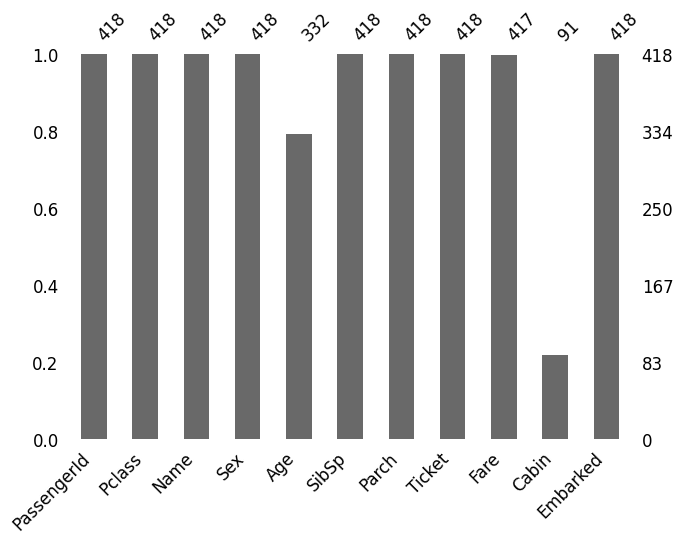

In [415]:
# Missing values in df_test
plt.figure(figsize=(16,5))
ax_test = plt.subplot(1,2,2)
mso.bar(df_test,ax=ax_test,fontsize = 12)

In [416]:
# Creer la colonne Travel_alone

# Remplacer nan par mode dans les colones SibSp et Parch
df_train['SibSp'].fillna(df_train['SibSp'].mode()[0], inplace=True)
df_train['Parch'].fillna(df_train['Parch'].mode()[0], inplace=True)
df_test['SibSp'].fillna(df_test['SibSp'].mode()[0], inplace=True)
df_test['Parch'].fillna(df_test['Parch'].mode()[0], inplace=True)

df_train['SibSp_or_Parch'] = df_train['SibSp'] + df_train['Parch']
df_test['SibSp_or_Parch'] = df_test['SibSp'] + df_test['Parch']


df_train['Travel_alone'] = np.where(df_train['SibSp_or_Parch'] > 0, False, True)
df_test['Travel_alone'] = np.where(df_test['SibSp_or_Parch'] > 0, False, True)

df_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,SibSp_or_Parch,Travel_alone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,False
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,False
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,True
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,False
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,0,True
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,0,True
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,3,False
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,0,True


In [417]:
# Extraire la colonne output (Survived)
output_column = ['Survived']
y_train = df_train['Survived']

# Separation en categorical_features et numerical_features
list_ignored_features = ['PassengerId', 'Name', 'SibSp', 'Parch', 'Ticket', 'Cabin', 'Survived']
list_numerical_features = ['Age', 'Fare']
list_categorical_features = ['Pclass', 'Sex', 'Embarked', 'SibSp_or_Parch', 'Travel_alone']

df_train.drop(columns = list_ignored_features, inplace=True, errors='ignore')
df_train
df_test.drop(columns = list_ignored_features, inplace=True, errors='ignore')
df_test

,Pclass,Sex,Age,Fare,Embarked,SibSp_or_Parch,Travel_alone
0,3,male,34.5,7.8292,Q,0,True
1,3,female,47.0,7.0000,S,1,False
2,2,male,62.0,9.6875,Q,0,True
3,3,male,27.0,8.6625,S,0,True
4,3,female,22.0,12.2875,S,2,False
...,...,...,...,...,...,...,...
413,3,male,NaN,8.0500,S,0,True
414,1,female,39.0,108.9000,C,0,True
415,3,male,38.5,7.2500,S,0,True
416,3,male,NaN,8.0500,S,0,True


In [418]:
# Lister les valeurs uniques pour en verifier le nombre avant l'encodage des categorical_features
for col in list_categorical_features:
  print(f'List of unique values in column {col} in df_train : {df_train[col].unique()}')
  print(f'List of unique values in column {col} in df_test : {df_test[col].unique()}')

# # Lister les valeurs uniques pour en verifier le nombre avant l'encodage des numerical_features
# for col in list_numerical_features:
#   print(f'List of unique values in column {col} in df_train : {df_train[col].unique()}')
#   print(f'List of unique values in column {col} in df_test : {df_test[col].unique()}')

List of unique values in column Pclass in df_train : [3 1 2]
List of unique values in column Pclass in df_test : [3 2 1]
List of unique values in column Sex in df_train : ['male' 'female']
List of unique values in column Sex in df_test : ['male' 'female']
List of unique values in column Embarked in df_train : ['S' 'C' 'Q' nan]
List of unique values in column Embarked in df_test : ['Q' 'S' 'C']
List of unique values in column SibSp_or_Parch in df_train : [ 1  0  4  2  6  5  3  7 10]
List of unique values in column SibSp_or_Parch in df_test : [ 0  1  2  4  3  5  7  6 10]
List of unique values in column Travel_alone in df_train : [False  True]
List of unique values in column Travel_alone in df_test : [ True False]


In [419]:
# Remplacer les nan
print('Remplacement par l element le plus frequent pour les categorical_features')
for col in list_categorical_features:
  df_train[col].fillna(df_train[col].mode()[0], inplace=True)
  df_test[col].fillna(df_test[col].mode()[0], inplace=True)


print('Remplacement par la moyenne pour les numerical_features')
for col in list_numerical_features:
  mean_value_col = round(df_train[col].mean(), 0)
  # df_train[col].fillna(df_train[col].mode()[0], inplace=True)
  df_train[col] = df_train[col].fillna(mean_value_col)
  # df_test[col].fillna(df_test[col].mode()[0], inplace=True)
  df_test[col] = df_test[col].fillna(mean_value_col)


print(df_train.head())
print(df_test.head())

Remplacement par l element le plus frequent pour les categorical_features
Remplacement par la moyenne pour les numerical_features
   Pclass     Sex   Age     Fare Embarked  SibSp_or_Parch  Travel_alone
0       3    male  22.0   7.2500        S               1         False
1       1  female  38.0  71.2833        C               1         False
2       3  female  26.0   7.9250        S               0          True
3       1  female  35.0  53.1000        S               1         False
4       3    male  35.0   8.0500        S               0          True
   Pclass     Sex   Age     Fare Embarked  SibSp_or_Parch  Travel_alone
0       3    male  34.5   7.8292        Q               0          True
1       3  female  47.0   7.0000        S               1         False
2       2    male  62.0   9.6875        Q               0          True
3       3    male  27.0   8.6625        S               0          True
4       3  female  22.0  12.2875        S               2         False


In [420]:
# Encoder les categorical_features
label_encoder_true_false = LabelEncoder()                                       # IL FAUDRA PEUT ETRE INVERSER TRUE FALSE DANS LA COLONNE Travel_alone
df_train['Travel_alone'] = label_encoder_true_false.fit_transform(df_train['Travel_alone'])
df_test['Travel_alone'] = label_encoder_true_false.fit_transform(df_test['Travel_alone'])

label_encoder_Sex = LabelEncoder()
df_train['Sex'] = label_encoder_Sex.fit_transform(df_train['Sex'])
df_test['Sex'] = label_encoder_Sex.fit_transform(df_test['Sex'])

label_encoder_Embarked = LabelEncoder()
df_train['Embarked'] = label_encoder_Embarked.fit_transform(df_train['Embarked'])
df_test['Embarked'] = label_encoder_Embarked.fit_transform(df_test['Embarked'])

print(df_train.head())
print(df_test.head())

   Pclass  Sex   Age     Fare  Embarked  SibSp_or_Parch  Travel_alone
0       3    1  22.0   7.2500         2               1             0
1       1    0  38.0  71.2833         0               1             0
2       3    0  26.0   7.9250         2               0             1
3       1    0  35.0  53.1000         2               1             0
4       3    1  35.0   8.0500         2               0             1
   Pclass  Sex   Age     Fare  Embarked  SibSp_or_Parch  Travel_alone
0       3    1  34.5   7.8292         1               0             1
1       3    0  47.0   7.0000         2               1             0
2       2    1  62.0   9.6875         1               0             1
3       3    1  27.0   8.6625         2               0             1
4       3    0  22.0  12.2875         2               2             0


In [421]:
df_train.drop(columns = ['Travel_alone'], inplace=True)
df_test.drop(columns = ['Travel_alone'], inplace=True)

x_train = df_train
x_test = df_test

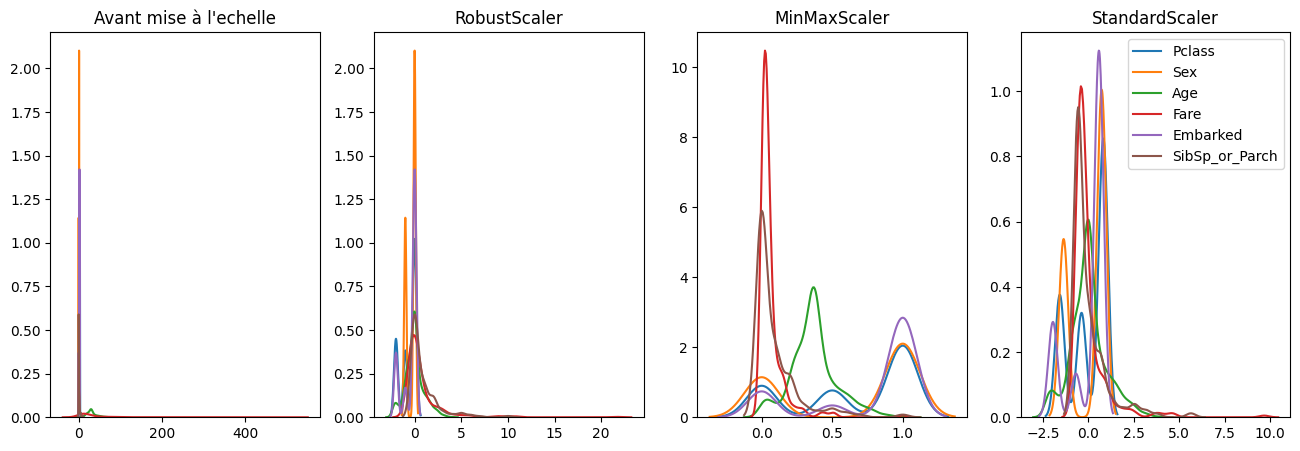

In [422]:
# Tester differents types de scaling

import seaborn as sns
def plotGraphAll(pdf, pscaled1, pscaled2, pscaled3):
    fig, (a, b, c, d) = plt.subplots(ncols=4, figsize=(16, 5))
    a.set_title("Avant mise à l'echelle")
    for col in pdf.columns:
        sns.kdeplot(pdf[col], ax=a)
    b.set_title("RobustScaler")
    for col in pscaled1.columns:
        sns.kdeplot(pscaled1[col], ax=b)
    c.set_title("MinMaxScaler")
    for col in pscaled2.columns:
        sns.kdeplot(pscaled2[col], ax=c)
    d.set_title("StandardScaler")
    for col in pscaled3.columns:
        sns.kdeplot(pscaled3[col], ax=d)

    list_columns = pdf.columns
    plt.legend(list_columns)
    a.set_xlabel("")
    a.set_ylabel("")
    b.set_xlabel("")
    b.set_ylabel("")
    c.set_xlabel("")
    c.set_ylabel("")
    d.set_xlabel("")
    d.set_ylabel("")

    plt.show()

input_features = list(df_train.columns)

scaler = RobustScaler()
scaled_df_train_1 = scaler.fit_transform(df_train[input_features])
scaled_df_train_1 = pd.DataFrame(scaled_df_train_1, columns=input_features)

scaler = MinMaxScaler()
scaled_df_train_2 = scaler.fit_transform(df_train[input_features])
scaled_df_train_2 = pd.DataFrame(scaled_df_train_2, columns=input_features)

scaler = StandardScaler()
scaled_df_train_3 = scaler.fit_transform(df_train[input_features])
scaled_df_train_3 = pd.DataFrame(scaled_df_train_3, columns=input_features)


plotGraphAll(df_train[input_features], scaled_df_train_1, scaled_df_train_2, scaled_df_train_3)

In [423]:
# Selection de MinMaxScaler pour un premier essai
sc = MinMaxScaler()
# sc = StandardScaler()
# sc = RobustScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

Epoch 1/200
72/72 [==============================] - 2s 5ms/step - loss: 0.9285 - accuracy: 0.4986 - val_loss: 0.8553 - val_accuracy: 0.5475
Epoch 2/200
72/72 [==============================] - 0s 3ms/step - loss: 0.8505 - accuracy: 0.5744 - val_loss: 0.7832 - val_accuracy: 0.5810
Epoch 3/200
72/72 [==============================] - 0s 3ms/step - loss: 0.7854 - accuracy: 0.5674 - val_loss: 0.7335 - val_accuracy: 0.6089
Epoch 4/200
72/72 [==============================] - 0s 3ms/step - loss: 0.7395 - accuracy: 0.5730 - val_loss: 0.7082 - val_accuracy: 0.6480
Epoch 5/200
72/72 [==============================] - 0s 3ms/step - loss: 0.7102 - accuracy: 0.6096 - val_loss: 0.6921 - val_accuracy: 0.6425
Epoch 6/200
72/72 [==============================] - 0s 3ms/step - loss: 0.6957 - accuracy: 0.6096 - val_loss: 0.6810 - val_accuracy: 0.6425
Epoch 7/200
72/72 [==============================] - 0s 3ms/step - loss: 0.6966 - accuracy: 0.5969 - val_loss: 0.6743 - val_accuracy: 0.6425
Epoch 8/200
7

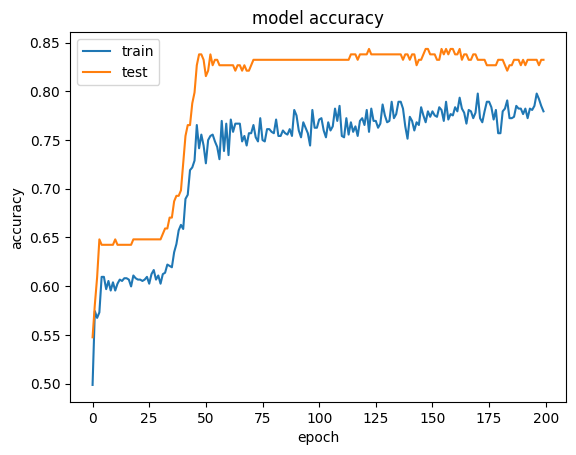

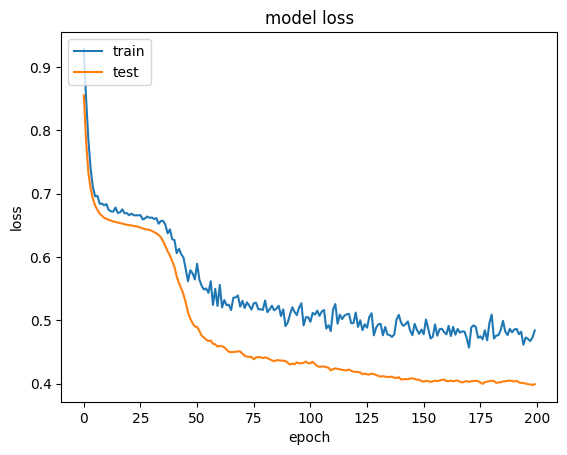

In [424]:
# Creation du modele
classifier_model = tf.keras.Sequential()

#Input layer with 6 inputs neurons
classifier_model.add(tf.keras.layers.Dense(3, activation = 'relu', input_dim = 6))
# #Input layer with 7 inputs neurons
# classifier_model.add(tf.keras.layers.Dense(5, activation = 'relu', input_dim = 7))

# Hidden layers
classifier_model.add(tf.keras.layers.Dropout(0.2))
# classifier_model.add(tf.keras.layers.Dropout(0.3))
# classifier_model.add(tf.keras.layers.Dense(16, activation = 'relu'))

# classifier_model.add(tf.keras.layers.Dense(3, activation = 'relu'))

classifier_model.add(tf.keras.layers.Dense(2, activation = 'relu'))
# Output layer with 1 output neuron which will predict 1 or 0
classifier_model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

# Compilation du modele
classifier_model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
# classifier_model.compile(optimizer = 'rmsprop', loss = 'binary_crossentropy', metrics = ['accuracy'])

# Entrainement du modele
# history = classifier_model.fit(x_train, y_train, validation_split=0.2, batch_size = 10, epochs = 200)
# history = classifier_model.fit(x_train, y_train, validation_split=0.2, batch_size = 50, epochs = 500)
history = classifier_model.fit(x_train, y_train, validation_split=0.2, batch_size = 10, epochs = 120)
# history = classifier_model.fit(x_train, y_train, validation_split=0.2, batch_size = 10, epochs = 100)
# history = classifier_model.fit(x_train, y_train, validation_split=0.2, batch_size = 20, epochs = 200)

# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [425]:
classifier_model.summary()

Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_54 (Dense)            (None, 3)                 21        
                                                                 
 dropout_17 (Dropout)        (None, 3)                 0         
                                                                 
 dense_55 (Dense)            (None, 2)                 8         
                                                                 
 dense_56 (Dense)            (None, 1)                 3         
                                                                 
Total params: 32
Trainable params: 32
Non-trainable params: 0
_________________________________________________________________


In [426]:
# Tester le modele sur le dataframe de test

# Il faudra ajouter une etape inverse_transform en cas de nouvelles données non transformées par StandardScaler()



prediction = classifier_model.predict(x_test).tolist()
# list to series
se = pd.Series(prediction)
# creating new column of predictions in data_check dataframe
df_check['check'] = se
df_check['check'] = df_check['check'].str.get(0)


series = []
for val in df_check.check:
    if val >= 0.5:
        series.append(1)
    else:
        series.append(0)
df_check['final'] = series
print('')
print(df_check)



match = 0
nomatch = 0
for val in df_check.values:
    if val[1] == val[3]:
        match = match +1
    else:
        nomatch = nomatch +1
print('')
# print(match)
# print(nomatch)
print(f"Predictions correctes: {match} ({round(match/(match+nomatch)*100,2)}%)")
print(f"Predictions incorrectes: {nomatch}")

14/14 [==============================] - 0s 2ms/step

     PassengerId  Survived     check  final
0            892         0  0.170328      0
1            893         1  0.347365      0
2            894         0  0.190421      0
3            895         0  0.150949      0
4            896         1  0.611888      1
..           ...       ...       ...    ...
413         1305         0  0.150949      0
414         1306         1  0.943282      1
415         1307         0  0.150949      0
416         1308         0  0.150949      0
417         1309         0  0.171522      0

[418 rows x 4 columns]

Predictions correctes: 408 (97.61%)
Predictions incorrectes: 10
